### **All kinds of AB Testing**

 I plan to conduct various A/B testing scenarios to demonstrate their purposes and appropriate statistical methods. The tests include:
  

*   `A Sample vs Population`: Compare a sample to a population assuming a normal distribution (use t-test).
*   `Two Numerical Independent Variables (Normal Distribution)`: Analyze two independent numerical variables with a normal distribution (use t-test).
*   `Two Numerical Independent Variables (Non-Normal Distribution)`: Evaluate two independent numerical variables with a non-normal distribution (use U-test / Mann-Whitney test).
*   `Two Numerical Dependent Variables (Normal Distribution)`: Test two dependent numerical variables with a normal distribution (use paired t-test).
*   `One Numerical vs One Categorical Variable`: Analyze one numerical and one categorical independent variable with a normal distribution (use ANOVA).



---



### **1-A Sample vs Population**

##### **Import Libraries**

In [ ]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

##### **Question**

We know that the average weight of whole orange in a country is 271 KG.

In [ ]:
population_mean = 271.93

A farmer claims that he invented a fertilizer that can increase average weight. In this case, we should collect a sample of data and run a T-test. Based on the hypothesis test, we can determine whether that fertilizer worked or not.

##### **Load Data**

In [ ]:
df = pd.read_csv('FILE PATH')
df.head()

,tree_number,oranges
0,1223,305.470796
1,1224,208.357224
2,1225,318.145987
3,1226,274.531146
4,1227,245.627474


We can see what is average of orange after using that fertilizer:

In [ ]:
df['oranges'].mean()

277.85280288314084

The result shows it is 6 KG more than the population average. But, we should do `A/B test` to make sure whether this difference is by chance or the fertilizer really increase the average weight.

##### **Hypothesis Test (A/B test)**

To conduct T-test, the data should follow a normal distribution. Therefore, we need to check for normality. Although there are many sophisticated and mathematical methods methods, here we draw a plot to visually assess whether it follows a Gaussian distribution.

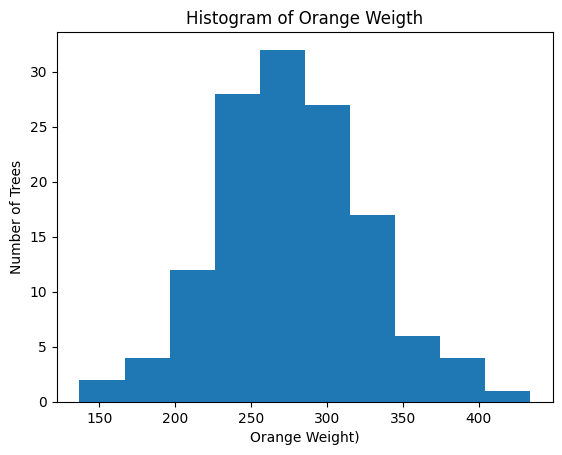

In [ ]:
plt.hist(df['oranges'])
plt.xlabel('Orange Weight)')
plt.ylabel('Number of Trees')
plt.title('Histogram of Orange Weigth')
plt.show()

We can see that the data follows normal distribution. Now, we run 1-sample test of T-student test:

In [ ]:
stats.ttest_1samp(a=df['oranges'], popmean = population_mean)

TtestResult(statistic=1.3413606837344207, pvalue=0.18210666026278088, df=132)

We have two hypothesis:

$H_0$: *There is a significant difference*

$H_1$: *The difference is by chance*

Just because `p > 0.05`, we reject `H0`, and we can say that difference is by chance. So, the fertilizer does not help to increase average weight of orange.



---



### **2-Two Numerical Independent Variables (Normal Distribution)**

##### **Import Libraries**

In [ ]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
from scipy.stats import shapiro

#####  **Question**

There are rumors that the average IELTS score for group 2 is higher than that of group 1. Is this actually true, or is the difference merely due to chance? If we were to select another group of students from the two populations, could the results be different?

#####  **Load Data**

In [ ]:
IELTS_data1 = pd.read_csv('DATA1')
IELTS_data2 = pd.read_csv('DATA2')

Now, let's see the average of score for each group:

In [ ]:
print('Average Score of First Group:' , IELTS_data1['ielts'].mean())
print('Average Score of Second Group:' , IELTS_data2['ielts'].mean())

Average Score of First Group: 6.7548042655547516
Average Score of Second Group: 6.956215007139257


The result shows average score of second group is more than the first group. But, we should do `A/B test` to make sure whether this difference is by chance or the average score of second group is higher than the first group.

#####  **Hypothesis Test (A/B test)**

To conduct T-test, the data should follow a normal distribution. Therefore, we need to check for normality. Although there are many sophisticated and mathematical methods methods, here we draw a plot to visually assess whether it follows a Gaussian distribution.

[Text(0.5, 1.0, 'Second Group'), Text(0.5, 0, 'IETLS Score')]

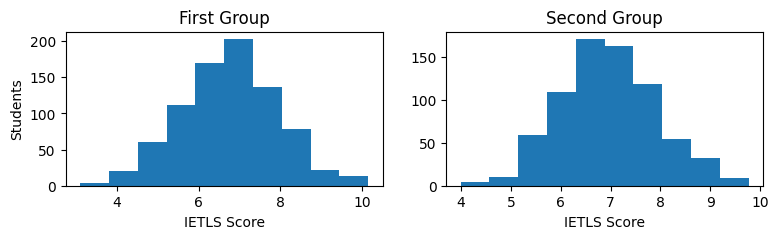

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(9,2))

ax1.hist(IELTS_data1['ielts'])
ax1.set(title='First Group', xlabel='IETLS Score', ylabel='Students')

ax2.hist(IELTS_data2['ielts'])
ax2.set(title='Second Group', xlabel='IETLS Score')

We can see that the data follow normal distribution. Also, we can do `Shapiro` test to make sure they are normal distribtuion:

In [ ]:
shapiro(IELTS_data1['ielts'])

ShapiroResult(statistic=0.9986569017835083, pvalue=0.8026722501359616)

In [ ]:
shapiro(IELTS_data2['ielts'])

ShapiroResult(statistic=0.9969682540621324, pvalue=0.18815401931732378)

Just because `p > 0.05`, it means `H0` is rejected and they are following normal distribution.

Now, we run independant test of T-student test.

In [ ]:
stats.ttest_ind(a = IELTS_data1['ielts'],
                b = IELTS_data2['ielts'])

TtestResult(statistic=-3.6538217675570297, pvalue=0.00026698442613130104, df=1548.0)

We have two hypothesis:

$H_0$: *There is a significant difference*

$H_1$: *The difference is by chance*

Just because `p < 0.05`, there is no evidence to reject `H0`, and we can say that difference is meaningful. So, the average IELTS score of second groupe is better than first one.



---



### **3-Two Numerical Independent Variables (Non-Normal Distribution)**

##### **Import Libraries**

In [ ]:
from scipy import stats
import numpy as np

##### **Question**

We have two data which are not following normal distribution. The mean of each group shows the average of second group is more than first group. But, we would like to know whether this difference is by chance or not.

In [ ]:
g1 = [20, 23, 21, 25, 18, 17, 18, 24, 20, 24, 23, 19]
g2 = [24, 25, 21, 22, 23, 28, 24, 27, 21, 23]

Now, let's see the average of score for each group:

In [ ]:
print(np.mean(g1))
print(np.mean(g2))

21.0
23.8


##### **Hypothesis Test (A/B test)**

In this case, we cannot use T-test and instead we should use U-test. We have two ways:

1.   Just test the differenece
2.   Test whether second group is greater than first


In [ ]:
stats.mannwhitneyu(g1,
                   g2,
                   alternative = 'two-sided')

MannwhitneyuResult(statistic=28.5, pvalue=0.039413690126797137)

In [ ]:
stats.mannwhitneyu(g1, g2, alternative='less')

MannwhitneyuResult(statistic=28.5, pvalue=0.019706845063398568)

We have two hypothesis:

$H_0$: *There is a significant difference*

$H_1$: *The difference is by chance*

Both tests show `p < 0.05`, there is no evidence to reject `H0`, and we can say that difference is meaningful. So, the mean of second group is greater than the first group.



---



### **4-Two Numerical Dependent Variables (Normal Distribution)**

#### **Import Libraries**

In [ ]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
from scipy.stats import shapiro

#### **Question**

A company claims to have invented a medicine that can help people gain weight. They selected several volunteers and measured their weight before using the medicine. After the volunteers consumed the medicine, the company measured their weight again.

The results showed that the average weight after using the medicine was greater than before. We would like to determine whether this difference is due to chance or if the medicine genuinely helps people gain weight.

In [ ]:
df = pd.read_csv('DATA')
df.head()

,weight_before,weight_after
0,65.126024,69.579014
1,67.081931,70.142003
2,72.380314,67.482958
3,63.592077,64.890133
4,57.333414,70.430886


Now, we can see the average of weight before and after:

In [ ]:
df.describe()

,weight_before,weight_after
count,410.000000,410.000000
mean,68.863354,70.425341
std,5.243526,4.975498
min,53.647173,56.991774
25%,65.136296,67.184292
50%,68.669384,70.455450
75%,72.729821,73.506856
max,85.056591,86.939716


#### **Hypothesis Test (A/B test)**

We can use T-test if the data is folloiwng normal distribution. So, let's see the histogram:

array([[<Axes: title={'center': 'weight_before'}>,
        <Axes: title={'center': 'weight_after'}>]], dtype=object)

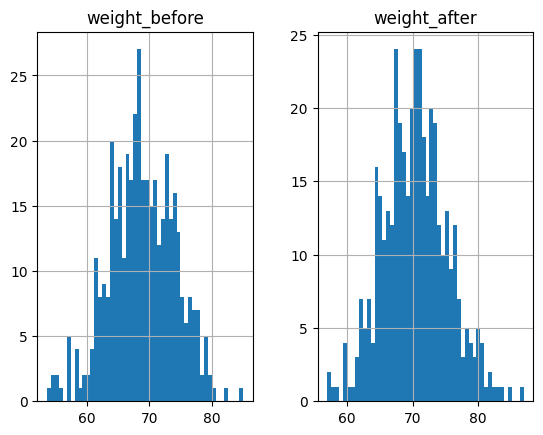

In [ ]:
df.hist(bins=50)

The charts show the data is following normal distribution. However, there are many other techniques. We can see that the data follow normal distribution. Also, we can do Shapiro test to make sure they are normal distribtuion:

In [ ]:
shapiro(df['weight_before'])

ShapiroResult(statistic=0.9961742706647152, pvalue=0.4300748591122168)

In [ ]:
shapiro(df['weight_after'])

ShapiroResult(statistic=0.9972688457949551, pvalue=0.7345623508983645)

Just because `p > 0.05`, it means `H0` is rejected and they are following normal distribution.

Now, we run independant test of T-student test.

In [ ]:
stats.ttest_rel(a = df['weight_before'],
                b = df['weight_after'])

TtestResult(statistic=-4.4624675042842386, pvalue=1.0488324309628723e-05, df=409)

We have two hypothesis:

$H_0$: *There is a significant difference*

$H_1$: *The difference is by chance*

Just because `p < 0.05`, there is no evidence to reject `H0`, and we can say that difference is meaningful. So, the medicince helps people to gain weight.



---



### **5-One Numerical vs One Categorical Variable**

##### **Import Libraries**

In [ ]:
import pandas as pd
from statsmodels.formula.api import ols
import statsmodels.api as sm

##### **Question**

A company launched three different campaigns to increase sales. They are wondering which campaign perfomred better. There is a caveat: the company is NOT willing to see whether those campaigns caused an increase in sales. In that case, they can use the `Dependent Groups T-Test`.

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/PORTFOLIO/1-Statistic/--9-AB Test - One Numerical vs One Categorical - Independent - Normal - (ANOVA)/data.csv')
df.head(3)

,Campain,Sell
0,A,12.6
1,A,12.0
2,A,11.8


##### **Hypothesis Test (ANOVA test)**

For testing this sitatuion, we should use `ANOVA`, because there might be relationship between a categorical variable `campaging` and numerical variable `sales`.

But befor doing that, let's see the average of sales for each campaign:

In [ ]:
df.groupby('Campain').mean()

,Sell
Campain,
A,12.542857
B,11.533333
C,11.825000


The results show that campaign `A` was more successful than others, but we need to test whether this difference is due to chance or if the campaign actually performed better.

In [ ]:
result = ols('Sell ~ Campain',
             data = df).fit()

sm.stats.anova_lm(result)

,df,sum_sq,mean_sq,F,PR(>F)
Campain,2.0,3.606905,1.803452,0.821297,0.455683
Residual,18.0,39.525476,2.195860,NaN,NaN


We have two hypothesis:

$H_0$: *There is a significant difference between groups*

$H_1$: *The difference is by chance and there is no difference between groups*

Just because `p > 0.05`, we do not reject `H0`, meaning there is no meaningful difference between campaigns. Therefore, this difference is likely due to chance, and campaign `A` did not perform better than the others.